Listening for your speech...
Recognizing speech...
Recognized Text: hello
Listening for your speech...
Recognizing speech...
Recognized Text: Sudarshan is not a good boy
Predicted Future Accuracy at time 3: 100.00%
Listening for your speech...
Recognizing speech...
Listening for your speech...
Recognizing speech...
Recognized Text: Sudarshan is not a good boy
Predicted Future Accuracy at time 4: 72.22%


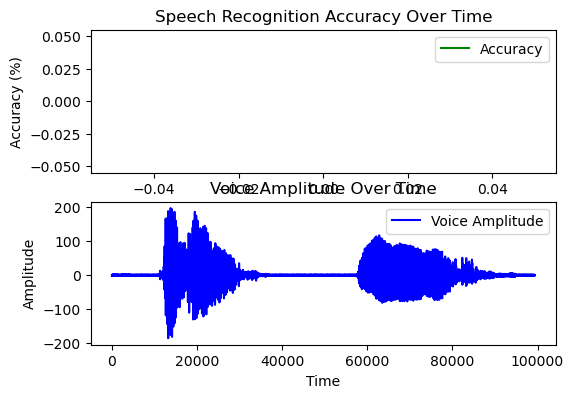

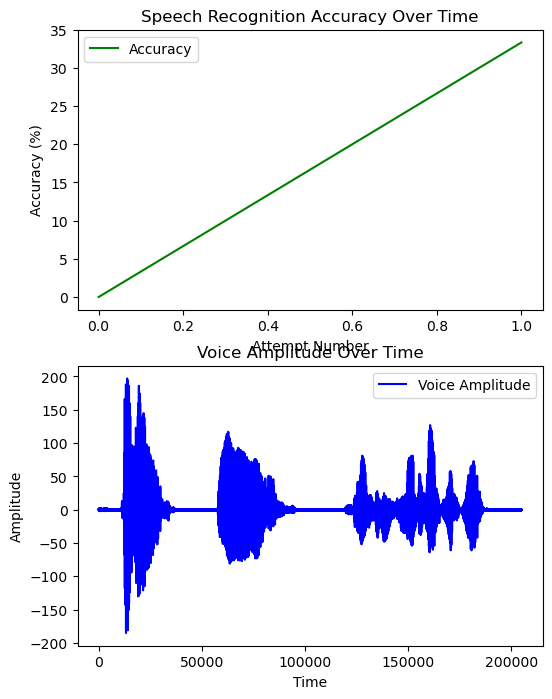

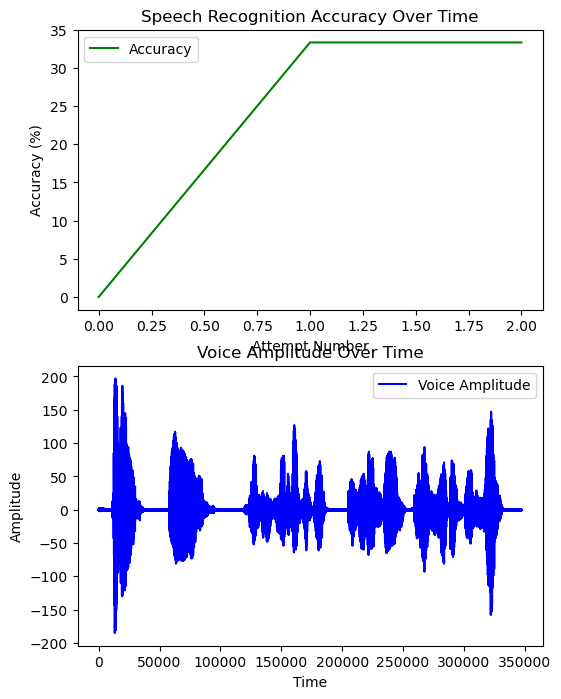

In [12]:
import tkinter as tk
import speech_recognition as sr
from tkinter import messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import librosa
import numpy as np
import random
from sklearn.linear_model import LinearRegression

# Initialize variables for accuracy tracking
recognized_text_list = []
correct_text_list = []
accuracy_scores = []
audio_data = []
time_stamps = []

def listen_and_transcribe():
    # Create recognizer instance
    recognizer = sr.Recognizer()

    # Use the microphone as the source
    with sr.Microphone() as source:
        print("Listening for your speech...")
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)

    # Recognize speech using Google Speech Recognition API
    try:
        print("Recognizing speech...")
        text = recognizer.recognize_google(audio)
        print(f"Recognized Text: {text}")

        # For this demo, we'll assume the 'correct' text is randomly generated or predefined
        correct_text = "Hello, this is a test speech"  # Replace with your expected speech
        recognized_text_list.append(text)
        correct_text_list.append(correct_text)

        # Record audio data for voice graph
        audio_data.append(np.frombuffer(audio.frame_data, dtype=np.int16))
        time_stamps.append(len(time_stamps))

        # Calculate accuracy score (basic method)
        accuracy = calculate_accuracy(text, correct_text)
        accuracy_scores.append(accuracy)

        # Display recognized text in the text widget
        result_text.delete(1.0, tk.END)
        result_text.insert(tk.END, text)

        # Update the accuracy graph and voice graph
        update_graph()

        # Predict future accuracy (for demonstration)
        predict_future_accuracy()

    except sr.UnknownValueError:
        messagebox.showerror("Error", "Speech could not be understood")
    except sr.RequestError:
        messagebox.showerror("Error", "API unavailable or error occurred")

def calculate_accuracy(recognized, correct):
    # Calculate the accuracy of recognition (simple example)
    recognized_words = set(recognized.split())
    correct_words = set(correct.split())
    intersection = recognized_words.intersection(correct_words)
    accuracy = len(intersection) / len(correct_words)
    return accuracy * 100

def update_graph():
    # Create the figure for the accuracy graph
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

    # Accuracy graph
    ax1.plot(range(len(accuracy_scores)), accuracy_scores, label="Accuracy", color="green")
    ax1.set_title("Speech Recognition Accuracy Over Time")
    ax1.set_xlabel("Attempt Number")
    ax1.set_ylabel("Accuracy (%)")
    ax1.legend()

    # Voice graph (Amplitude)
    if audio_data:
        # Flatten the audio data and plot the amplitude
        voice_amplitude = np.concatenate(audio_data)
        ax2.plot(np.linspace(0, len(voice_amplitude), len(voice_amplitude)), voice_amplitude, label="Voice Amplitude", color="blue")
        ax2.set_title("Voice Amplitude Over Time")
        ax2.set_xlabel("Time")
        ax2.set_ylabel("Amplitude")
        ax2.legend()

    # Display the graph in the Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()

def predict_future_accuracy():
    # Basic machine learning model to predict future accuracy
    if len(accuracy_scores) > 1:  # Need at least two data points
        # Reshape data for linear regression model
        X = np.array(time_stamps).reshape(-1, 1)
        y = np.array(accuracy_scores)

        model = LinearRegression()
        model.fit(X, y)

        # Predict future accuracy (next point)
        future_time = len(time_stamps) + 1
        future_accuracy = model.predict([[future_time]])[0]
        print(f"Predicted Future Accuracy at time {future_time}: {future_accuracy:.2f}%")

# Create a window instance
window = tk.Tk()
window.title("Speech to Text App with Accuracy & Voice Graph")
window.geometry("600x500")

# Label
label = tk.Label(window, text="Click 'Start Listening' and speak", font=("Arial", 14))
label.pack(pady=10)

# Button to start speech recognition
listen_button = tk.Button(window, text="Start Listening", font=("Arial", 12), bg="lightblue", command=listen_and_transcribe)
listen_button.pack(pady=20)

# Text area to display recognized text
result_text = tk.Text(window, height=8, width=40, font=("Arial", 12))
result_text.pack(pady=10)

# Start the Tkinter event loop
window.mainloop()

